# Funkcije u Python-u

Sa porastom kompleksnosti programskog koda koji se kreira, postaje sve važnije da se pojedini delovi koda organizuju u modularne blokove. Tome služe korisnički definisane funkcije, tj. funkcije koje samostalno definišemo i pišemo. Na taj način pojednostavljuje se pisanje koda, povećava njegova čitljivost i omogućava se ponovna upotreba nekih programskih sekvenci pod drugačijim uslovima ili u drugačijem kontekstu. Postoji mnogo načina da se definišu funkcije u Python-u. Ovde će biti predstavljen jedan od elementarnijih postupaka, i najčešći u primeni, s obzirom da će njihova dalja upotreba u okviru predmeta biti namenjena isključivo numeričkim algoritmima.

Paket NumPy sadrži veliki broj matematičkih fukcija. Lista se može naći na [lista rutina](http://docs.scipy.org/doc/numpy/reference/routines.math.html). Iako je lista poprilična, s vremena na vreme, može da se dođe u situaciju da je potrebna upotreba funkcije koja nije već dostupna u okviru NumPy ili neke druge Python biblioteke. Osim toga, algoritmi numeričke linearne algebre implementirani u okviru NumPy modula ne mogu se svrstati u najpouzdanije, kada se porede sa sličnim funkcijama programskih jezika kao što su Matlab ili Wolfram Mathematica. Zbog toga može biti od koristi poznavanje načina za kreiranje sopstvenih funkcija. Jedan od mogućih načina prikazaćemo kroz primer funkcije ${\rm sinc}\,x$ definisane sa
$${\rm sinc}\, x ≡ \dfrac{\sin x}{x} .$$
Jasno je da je gornji izraz definisan za sve vrednosti $x\neq0.$ Zbog toga, pretpostavka je da specijalno ${\rm sinc}\,0=1=\displaystyle\lim_{x\to0}\dfrac{\sin x}{x} .$
Predstavićemo postupno način definisanja funkcije ${\rm sinc}\, x$ u Python-u.

In [1]:
import numpy as np

In [2]:
def sinc(x):
    y = np.sin(x)/x
    return y

Definicija svake funkcije počinje rezervisanom reči `def` za kojom sledi ime funkcije kakvo želimo da ona nosi. U ovom slučaju ime funkcije je `sinc` što nije bila prethodno rezervisana reč u Pythonu. Unutar zagrada `()` stoji lista ulaznih argumenata funkcije koja se definiše. U slučaju funkcije `sinc` to je samo jedan argument $x.$ Funkcija naravno može da bude i bez ulaznih argumenata, u tom slučaju ostavljaju se prazne zagrade. Simbol `:` označava početak tela funkcije, tj. programskog bloka koji se izvršava prilikom njenog poziva. Dužina tela funkcije određena je uvlačenjem reda. Drugim rečima, prekid uvlačenja reda prilikom upisa u kodnu ćeliju označava kraj tela funkcije. 

Proveru rada definisane funkcije možemo da obavimo njenim pozivanjem za neku konkretnu vrednost argumenta, kao što je urađeno u narednoj kodnoj ćeliji.

In [3]:
sinc(2.3)

0.32421965746813924

Dobijeni rezultat možemo da proverimo izračunavanjem ovog količnika na uobičajen način.

In [4]:
np.sin(2.3)/2.3

0.32421965746813924

Problem koji smo uočili sa argumentom $x=0$ produkovaće problem u prethodno definisanoj funkciji.

In [5]:
sinc(0)

<ipython-input-2-c88267f2b580>:2: RuntimeWarning: invalid value encountered in double_scalars
  y = np.sin(x)/x


nan

Zbog toga vršimo promenu definicije sa obradom ovog izuzetka.

In [6]:
def sinc(x):
    if x==0:
        y=1
    else:
        y = np.sin(x)/x
    return y

In [7]:
sinc(0)

1

In [8]:
sinc(2.21)

0.36315432861843766

Prethodna definicija Python funkcije ${\rm sinc}\, x$ radi kada je argument sa kojim se poziva jedan broj.Ipak, u slučaju niza vrednosti, tj. vektorizacije izračunavanja, nailazi se na problem kao što je prikazano sledećim pozivom.

In [9]:
x = np.arange(0, 5., 0.5)
sinc(x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Problem je nastao zbog testa jednakosti koji nije predviđen za nizove vrednosti. Problem niza vrednosti može da se reši na sledeći način. To nije jedino moguće rešenje, ali spada u prirodnu primenu NumPy mogućnosti. 

In [10]:
def sinc(x):
    z = np.where(x == 0.0, 1.0, np.sin(x)/x)
    return z

In [11]:
sinc(x)

<ipython-input-10-fbd9971a030b>:2: RuntimeWarning: invalid value encountered in true_divide
  z = np.where(x == 0.0, 1.0, np.sin(x)/x)


array([ 1.        ,  0.95885108,  0.84147098,  0.66499666,  0.45464871,
        0.23938886,  0.04704   , -0.10022378, -0.18920062, -0.21722892])

Prilikom primene NumPy modula cilj je izbegavanje upotrebe `for` i `while` petlji za obradu elemenata nizova kad god je to moguće. To se naročito odnosi na petlje koje bi imale veliki broj prolaza. Jedan od ciljeva ovih radnih svezaka jeste da se na samom početku rada u Python-u naviknete na takav način razmišljanja - vektorizacija izračunavanja. Sa češćom primenom metoda za procesiranje nizova na jednostavnijim primerima bićete u mogućnosti da identifikujete slične situacije i u složenijim problemima. Na taj način se dobija na brzini izvršenja programskog koda, naročito kada se radi sa nizovima velikih dimenzija.
Funkcije modula NumPy su namenjene upravo ovakvom pristupu u rešavanju problema.

Kreiraćemo sada funkciju sa više argumenata. Na osnovu podataka $r$-poluprečnik kružnice, $(x0,y0)-$koordinate centra kružnice i $n-$ broj tačaka, ova funkcija vraća koordinate $n$ ekvidistantnih tačaka sa kružnice koja ima unete parametre. Koordinate su smeštene u dva niza. Prvi odgovara $x$ koordinatama, a drugi odgovara $y$ koordinatama. Na taj način dobijamo podatke spremne za grafički prikaz.

In [18]:
def kruznica(r, x0, y0, n):
    theta = np.linspace(0., 2*np.pi, n)
    x, y = r * np.cos(theta), r * np.sin(theta)
    return x0+x, y0+y

In [13]:
import matplotlib as mplb
import matplotlib.pyplot as plt

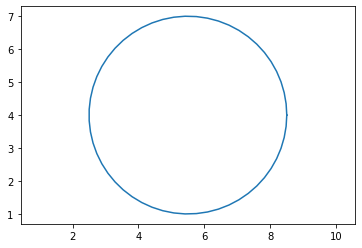

In [19]:
xk,yk=kruznica(3,5.5,4,56)
plt.plot(xk,yk)
plt.axis('equal');

Često je korisno da neki argumenti funkcije koju definišemo imaju podrazumevanu vrednost, tj. da postoje opcioni argumenti funkcije koju definišemo. To se koristi kada se definisana funkcija koristi najčešće za neku konkretnu vrednost ulaznog argumenta. Na primer, za prethodnu funkciju možemo da pretpostavimo da je dovoljno 50 tačaka za dobar grafički prikaz, kao i da je centralna jedinična kružnica nešto što se najčešće koristi.
U tom slučaju prethodnu definiciju funkcije dopunjujemo odgovarajućim vrednostima.

In [21]:
def kruznica(r=1, x0=0, y0=0, n=50):
    theta = np.linspace(0., 2*np.pi, n)
    x, y = r * np.cos(theta), r * np.sin(theta)
    return x0+x, y0+y

Dakle, podrazumevane vrednosti se specificiraju u definiciji ulaznih argumenata. Ne moraju svi argumenti da budu opcioni. Drugim rečima, neki od znakova jednakosti u gornjoj definciji mogu da se preskoče. Na taj način definišemo argumente koje korisnik obavezno mora da navede prilikom poziva ovakve funkcije. 

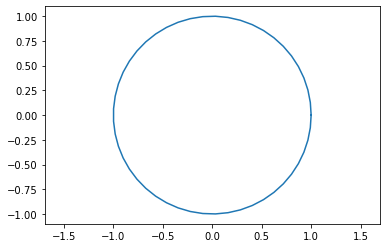

In [22]:
xk,yk=kruznica()
plt.plot(xk,yk)
plt.axis('equal');

Ukoliko se prilikom poziva funkcije žele da promene vrednosti samo pojedinih opcionih argumenata, to se postiže navođenjem imena argumenta (kako se zove promenljiva u definiciji funkcije) i navođenjem željene vrednosti.

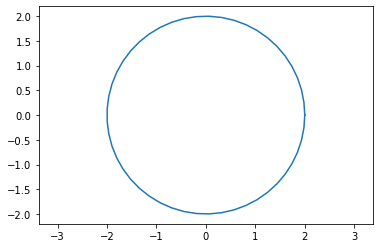

In [23]:
xk,yk=kruznica(2)  # r je prvi argument pa se navedena vrednost tretira kao r
plt.plot(xk,yk)
plt.axis('equal');

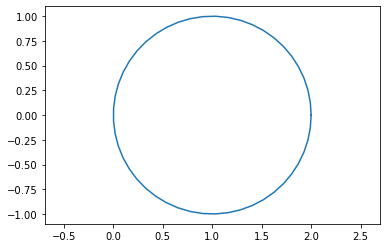

In [24]:
xk,yk=kruznica(x0=1)
plt.plot(xk,yk)
plt.axis('equal');

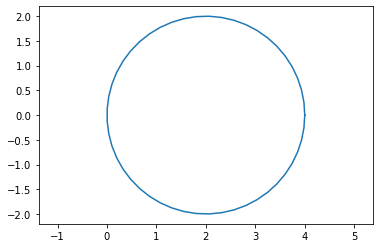

In [25]:
xk,yk=kruznica(x0=2,r=2)
plt.plot(xk,yk)
plt.axis('equal');